# Bonus

The dataset you used in Challenge 1 and 2, was in fact an engineered version of a [public NBA dataset available on Kaggle](https://www.kaggle.com/datasets/visalakshiiyer/nba-match-data) 🏀

🎯 Investigate the full feature set, do an exploratory data analysis, experiment with other features and approaches to improve your ability to predict a player's *Win Above Replacement* rating.

⚠️ Don't forget to diagnose model performance along the way.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('file:///Users/bita/Downloads/NBA%20(1).csv')

In [4]:
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [5]:
df.describe()

,season,poss,mp,do_ratio,pacing,win_rating
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2001.306750,2781.608750,1379.898500,-1.175324,0.190640,2.044921
std,12.515223,2021.057822,998.745215,3.004908,0.840869,3.473775
min,1977.000000,1.000000,0.000000,-32.624682,-5.965230,-5.428715
25%,1991.000000,960.750000,476.000000,-2.801314,-0.234717,-0.101300
50%,2002.000000,2577.000000,1269.000000,-1.153920,0.088102,0.626639
75%,2012.000000,4340.750000,2155.000000,0.533330,0.509212,3.233072
max,2021.000000,9271.000000,4270.000000,28.370510,23.732063,26.666873


In [6]:
df.corr()

,season,poss,mp,do_ratio,pacing,win_rating
season,1.000000,-0.151459,-0.115696,0.010404,-0.081842,-0.042861
poss,-0.151459,1.000000,0.995324,0.587754,-0.301149,0.742017
mp,-0.115696,0.995324,1.000000,0.590354,-0.303684,0.748268
do_ratio,0.010404,0.587754,0.590354,1.000000,-0.169967,0.666120
pacing,-0.081842,-0.301149,-0.303684,-0.169967,1.000000,-0.202611
win_rating,-0.042861,0.742017,0.748268,0.666120,-0.202611,1.000000


In [7]:
X = df[['season', 'poss', 'mp', 'do_ratio', 'pacing']]
y = df['win_rating']

In [8]:
import matplotlib.pyplot as plt

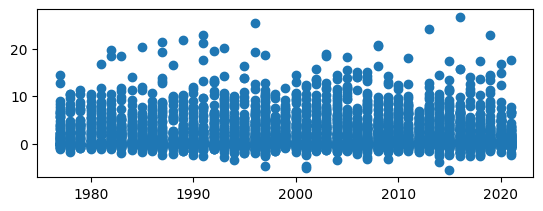

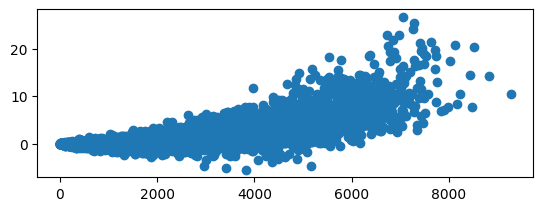

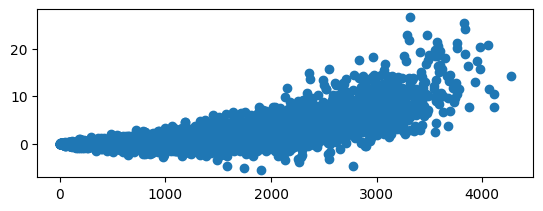

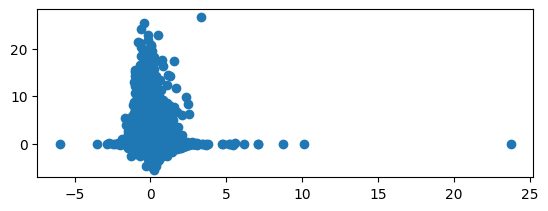

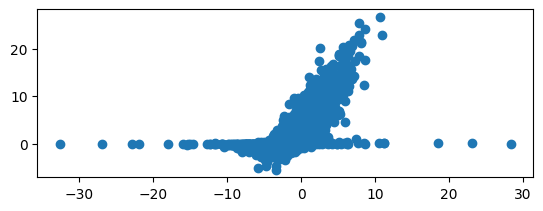

In [59]:


ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.scatter(df['season'], y)
plt.show()

ax2 = plt.subplot(212)
ax2.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax2.scatter(df['poss'], y)
plt.show()

ax3 = plt.subplot(212)
ax3.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax3.scatter(df['mp'], y)
plt.show()

ax4 = plt.subplot(212)
ax4.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax4.scatter(df['pacing'], y)
plt.show()

ax5 = plt.subplot(212)
ax5.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax5.scatter(df['do_ratio'], y)
plt.show()



In [60]:
df

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614
...,...,...,...,...,...,...
3995,1986,1224,565,-1.761425,-0.011698,0.082828
3996,1994,3564,1785,0.907199,-0.125856,3.542416
3997,1998,706,378,0.848178,0.694183,0.787185
3998,2003,289,156,-6.298906,0.205844,-0.312601


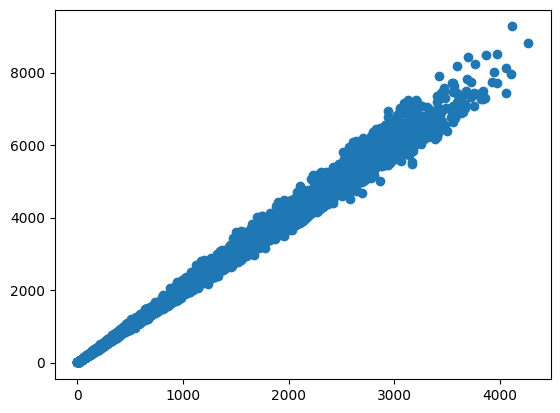

In [61]:
plt.scatter(df.mp, df.poss)

In [62]:
df.corr().style.background_gradient(cmap='coolwarm')

,season,poss,mp,do_ratio,pacing,win_rating
season,1.000000,-0.151459,-0.115696,0.010404,-0.081842,-0.042861
poss,-0.151459,1.000000,0.995324,0.587754,-0.301149,0.742017
mp,-0.115696,0.995324,1.000000,0.590354,-0.303684,0.748268
do_ratio,0.010404,0.587754,0.590354,1.000000,-0.169967,0.666120
pacing,-0.081842,-0.301149,-0.303684,-0.169967,1.000000,-0.202611
win_rating,-0.042861,0.742017,0.748268,0.666120,-0.202611,1.000000


In [93]:
df_scaled2 = df.copy()
df_scaled2.drop(columns='mp', inplace=True)

for feature in df_scaled2.columns:
    mu = df[feature].mean()
    sigma = df[feature].std()
    df_scaled2[feature] = df_scaled2[feature].apply(lambda x: (x-mu)/sigma)
    
df_scaled1

KeyError: "['mp'] not found in axis"

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dataframe = pd.DataFrame()

dataframe["features"] = df_scaled2.columns

dataframe["vif_index"] = [vif(df_scaled2.values, i) for i in range(df_scaled2.shape[1])]

round(dataframe.sort_values(by="vif_index", ascending = False),2)

,features,vif_index
4,win_rating,2.73
1,poss,2.55
2,do_ratio,1.88
3,pacing,1.12
0,season,1.06


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dataframe = pd.DataFrame()

dataframe["features"] = df_scaled1.columns

dataframe["vif_index"] = [vif(df_scaled1.values, i) for i in range(df_scaled1.shape[1])]

round(dataframe.sort_values(by="vif_index", ascending = False),2)

,features,vif_index
4,win_rating,2.76
1,mp,2.55
2,do_ratio,1.87
3,pacing,1.12
0,season,1.04


In [78]:
df = df_scaled2.head()
df

,season,poss,do_ratio,pacing,win_rating
0,-1.143148,1.021936,-0.123449,-0.940168,-0.115675
1,1.253933,1.385607,0.722788,0.405828,2.522762
2,1.174030,1.085764,0.471869,-0.074523,0.290707
3,1.573544,-0.793450,-0.056069,-1.655042,-0.522462
4,-1.063245,0.867066,-0.212541,-0.380127,-0.327974


In [94]:
df = pd.read_csv('file:///Users/bita/Downloads/NBA%20(1).csv')

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X = df[['season', 'poss', 'do_ratio', 'pacing']]
y = df['win_rating']

model = LinearRegression()

cv = cross_validate(model, X, y, cv=5)

cv['test_score'].mean()

0.6263392651307975

# 🏁